In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

# 1. 분류 예측의 불확실성 추정

In [7]:
# scikit-learn에서 많이 사용하는 인터페이스 중 하나는 분류기에 예측의 불확실성을 
# 추정할 수 있는 기능
# scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수
# 1) decision_function
# 2) predict_proba

# 대부분의 분류 클래스는 적어도 둘 중 하나를 제공하거나 두 함수 모두 제공한다.

# GradientBoostingClassifier 분류기의 decision_function(), predict_proba() 메서드 역할
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# 예제를 위해 클래스 이름 'blue', 'red'로 변경
y_named = np.array(["blue", "red"])[y]
# 여러 배열을 한꺼번에 train_test_split에 넣을 수 있다.
# training set와 test set로 나뉘는 방식은 모두 같다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
            X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

# 2. 결정 함수

In [9]:
# 이진 분류에서 decision_function 반환값의 크기: (n_samples,)
# 각 sample이 하나의 실수값을 반환

print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

# 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [14]:
# 양수: 양성 클래스, 음수: 음성(즉 다른) 클래스

# 결정 함수 결과 중 앞부분 일부 확인
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [13]:
# 결정 함수의 부호만 보고 예측 결과를 알 수 있다.
print("임계치와 결정 함수 결과 비교:\n{}".format(gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

# 이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫 번째 원소, 
# 양성 클래스는 두 번째 원소

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [15]:
# 그래서 predict 함수의 결과를 완전히 재현하려면 classes_ 속성을 사용하면 된다.

# boolean을 0, 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용한다.
pred = gbrt.classes_[greater_zero]
# pred와 gbrt.predict 결과 비교
print("pred는 예측 결과와 같다: {}".format(np.all(pred == gbrt.predict(X_test))))

pred는 예측 결과와 같다: True


In [18]:
# decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.

decision_function = gbrt.decision_function(X_test)

print("결정 함수의 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function),
                                                    np.max(decision_function)))

# decision_function의 출력 범위가 임의의 값이라 이해하긴 어렵다.

결정 함수의 최솟값: -7.69 최댓값: 4.29


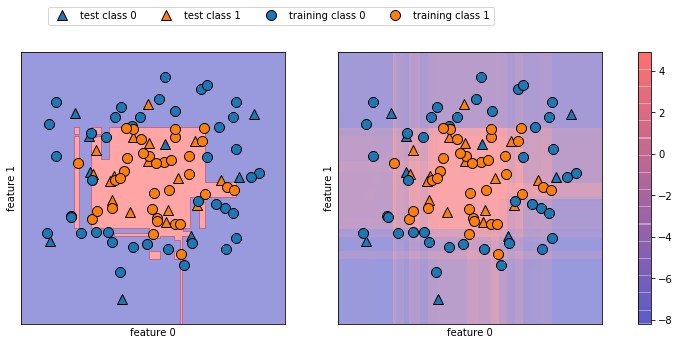

In [26]:
# 2차원 평면의 모든 점에 대해 decision_function값을 색으로 표현하여 앞서 본 결정 경계와
# 그래프로 나타내기
# training data: 원
# test data: 삼각형

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, 
                                cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
                                           cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar= plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "training class 0", "training class 1"],
              ncol=4, loc=(.1, 1.1))

# 2차원 예제 데이터셋을 사용해 만든 그래디언트 부스팅 모델의 결정경계(좌), 결정함수(우)
# 예측 결과 뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻게 된다.
# 그러나 결정 함수 그래프에서 두 클래스 사이의 결계를 구분하기는 어렵다.

# 3. 예측 확률

In [30]:
# predict_proba의 출력: 각 클래스에 대한 확률
# decision_function의 출력보다 이해하기 더 쉽다.
# 값의 크기: 이진분류에서는 항상 (n_sample, 2)

print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))
print()

# 각 행의 첫 번째 원소: 첫 번째 클래스의 예측 확률
# 각 행의 두 번째 원소: 두 번째 클래스의 예측 확률
# 확률이기 때문에 출력은 항상 0 ~ 1 값
# 두 클래스에 대한 확률의 합은 항상 1

print("예측 확률:\n{}".format(gbrt.predict_proba(X_test[:6])))

# 확률값은 실수이고 두 클래스가 정확히 0.500이 될 가능성이 거의 없기 때문에
# 두 클래스 중 하나는 50% 이상의 확신을 가질 것이 틀림없다.
# 그리고 바로 그 클래스가 예측값이 된다.

# 분류기가 대부분 포인트에서 비교적 강하게 확신하고 있다.
# 테이터의 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달렸다.
# 과대적합된 모델은 혹 잘못된 예측이라도 예측이 확신이 강한 편이다.
# 일반적으로 복잡도가 낮은 모델은 예측에 불확실성이 더 많다.
# 이런 불확실성과 모델의 정확도가 동등할 때 보정(calibration) 되었다고 한다.
# 즉 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 낼 것이다.

확률 값의 형태: (25, 2)

예측 확률:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


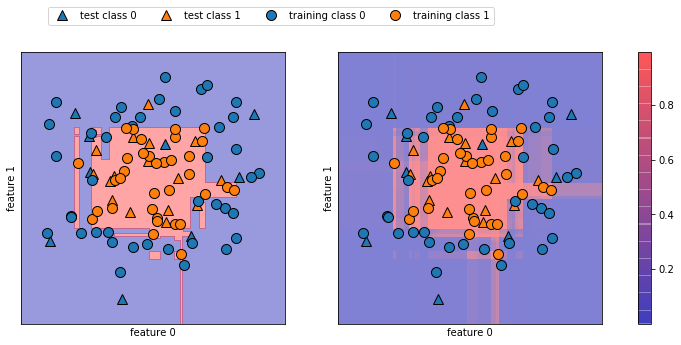

In [31]:
# 결정 경계와 클래스 1의 확률

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True,
                               cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5,
                                           cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["test class 0", "test class 1", "training class 0", "training class 1"]
               , ncol=4, loc=(.1, 1.1))

# 위 그래디언트 부스팅 모델의 결정 경계(좌), 예측 확률(우)
# 이 그래프의 경계는 훨씬 잘 나타나 있으며 불확실성이 있는 작은 영역들도
# 잘 확인할 수 있다.

# 많은 모델의 불확실성 추정 비교한 그림
# scikit-learn 웹사이트 http://bit.ly/2cqCYx6

# 4. 다중 분류에서의 불확실성

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test[:6, :])))

# 다중 분류에서 decision_function 결과값 크기: (n_samples, n_classes)
# 수치가 크면 그 클래스일 가능성이 크다.
# 수치가 작으면 그 클래스일 가능성이 낮다.


결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [34]:
# 데이터 포인트마다 점수들에서 가장 큰 값을 찾아 예측 결과를 재현할 수 있다.

print("가장 큰 결정 함수의 인덱스:\n{}".format(np.argmax(gbrt.decision_function(X_test)
                                             , axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [35]:
# predict_proba 출력값의 크기: (n_samples, n_classes)
# 마찬가지로 각 데이터 포인트에서 클래스 확률의 합: 1

print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행방향으로 확률 더하기
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
합: [1. 1. 1. 1. 1. 1.]


In [37]:
# predict_proba 결과에 argmax() 함수를 적용해서 예측을 재현할 수 있다.

print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(gbrt.predict_proba(X_test),
                                                                axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
# 정리
# predict_proba와 decision_function 결괏값 크기는 항상 (n_samples, n_classes)
# 이진 분류의 decision_function은 조금 다르다.
# 이진 분류에서의 decision_function은 열은 1개, 
# 양성 클래스인 classes_[1]에 대응하는 값

# 열이 n_classes개일 때는 열을 가로질러서 argmax() 함수를 적용해 예측 결과 재현 가능
# 하지만 클래스가 문자열/정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수
# 있다.
# * 클래스가 숫자일 경우
#   predict_proba와 descision_function의 배열 인덱스와 같을 수 있다.
#   이런 경우 argmax 값이 그대로 예측 클래스가 된다.
#   하지만 클래스 숫자가 "1"처럼 문자열일 수 있고 연속된 숫자가 아닐 수 있으므로
#   항상 classes_의 값을 사용하는 것이 버그를 미연에 방지하는 길이다.